In [1]:
import pandas as pd
pd.__version__

'1.0.1'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Load Data

In [3]:
from glob import glob
list_files = glob('D:/Works/MachineLearningProject/hubway-data/201*.csv')

In [4]:
df = pd.concat((pd.read_csv(file) for file in list_files),ignore_index=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,277,Subscriber,1984,1
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.373,-71.0944,648,Subscriber,1985,1
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.3651,-71.1031,555,Subscriber,1974,1
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,1307,Subscriber,1987,1
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374,-71.1014,177,Customer,1986,2


In [5]:
df.shape

(3627544, 15)

# 2. Aggregate Data

### Convert to date type

In [6]:
df['starttime'] = pd.to_datetime(df.starttime)
df['stoptime'] = pd.to_datetime(df.stoptime)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,277,Subscriber,1984,1
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.373,-71.0944,648,Subscriber,1985,1
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.3651,-71.1031,555,Subscriber,1974,1
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,1307,Subscriber,1987,1
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374,-71.1014,177,Customer,1986,2


### Aggregate data with weekend and weekday

In [7]:
df['dayofweek'] = df.starttime.dt.day_name()
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,277,Subscriber,1984,1,Thursday
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.373,-71.0944,648,Subscriber,1985,1,Thursday
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.3651,-71.1031,555,Subscriber,1974,1,Thursday


### Aggregate data on hourly basis

In [8]:
df['starttime'] = df.starttime.dt.hour
df['stoptime'] = df.stoptime.dt.hour
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,dayofweek
0,542,0,0,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.3734,-71.1111,277,Subscriber,1984,1,Thursday
1,438,0,0,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.373,-71.0944,648,Subscriber,1985,1,Thursday
2,254,0,0,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.3651,-71.1031,555,Subscriber,1974,1,Thursday


In [9]:
df.dtypes

tripduration                 int64
starttime                    int64
stoptime                     int64
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id              object
end station name            object
end station latitude        object
end station longitude       object
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dayofweek                   object
dtype: object

# 3. Clustering O/D Flow 

### 3.1 Data Selection  

In [10]:
df_flow = df.drop(['start station name','end station name','bikeid'],axis=1)
df_flow['bike'] = 1
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,dayofweek,bike
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1984,1,Thursday,1
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,1985,1,Thursday,1
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,1974,1,Thursday,1
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1987,1,Thursday,1
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,1986,2,Thursday,1


In [11]:
gender = df_flow.gender.unique()
gender

array([1, 2, 0], dtype=int64)

### 3.2 Data Process

#### Remove gender=0(NaN value)

In [12]:
df_flow = df_flow[(df_flow.gender==1)|(df_flow.gender==2)]

#### Convert weekday and weekend to number

In [13]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend = ['Saturday','Sunday']
def conv2num(day):
    if day in weekdays:
        return "weekday"
    if day in weekend:
        return "weekend"
daylist = df_flow.loc[:,'dayofweek'].apply(conv2num)
df_flow.dayofweek = daylist
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,dayofweek,bike
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1984,1,weekday,1
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,1985,1,weekday,1
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,1974,1,weekday,1
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1987,1,weekday,1
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,1986,2,weekday,1


#### Convert hour to timeflow

In [14]:
df_flow['timeflow'] = pd.cut(df_flow.starttime, bins=[-1,7,12,17,23],labels=['night','morning','afternoon','evening'])
df_flow.tail()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,dayofweek,bike,timeflow
3627539,248,23,23,117,42.366095,-71.086388,141,42.3636,-71.0822,Subscriber,1965,1,weekend,1,evening
3627540,261,16,16,54,42.354979,-71.063348,42,42.3526,-71.0677,Subscriber,1955,1,weekday,1,afternoon
3627541,983,8,8,54,42.354979,-71.063348,58,42.3555,-71.0728,Subscriber,1987,1,weekend,1,morning
3627542,1751,12,12,54,42.354979,-71.063348,46,42.3437,-71.0858,Subscriber,1989,1,weekend,1,morning
3627543,1574,18,18,54,42.354979,-71.063348,21,42.346,-71.0826,Subscriber,1984,2,weekend,1,evening


#### Convert birthyear to age

In [15]:
df_flow['birth year'] = pd.to_numeric(df_flow['birth year'],errors='coerce')
df_flow['age'] = 2015-df_flow['birth year']
df_flow = df_flow.drop(['birth year'],axis=1)
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,gender,dayofweek,bike,timeflow,age
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1,weekday,1,night,31.0
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,1,weekday,1,night,30.0
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,1,weekday,1,night,41.0
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,1,weekday,1,night,28.0
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,2,weekday,1,night,29.0


### 3.3 Visualize the data

In [16]:
df_gender = df_flow.groupby(['gender','timeflow']).agg({'bike':'count'})
df_gender.columns = ['occurence']
df_gender = df_gender.reset_index()
df_gender

,gender,timeflow,occurence
0,1,night,248208
1,1,morning,646440
2,1,afternoon,769091
3,1,evening,538716
4,2,night,80805
5,2,morning,226908
6,2,afternoon,255234
7,2,evening,172733


In [17]:
def sex(x):
    if x==1:
        return "Man"
    else:
        return "Woman"
df_gender['gender'] = df_gender.gender.apply(sex)

Text(0.5, 1.1, 'Histogram of Trips during different period time per Gender')

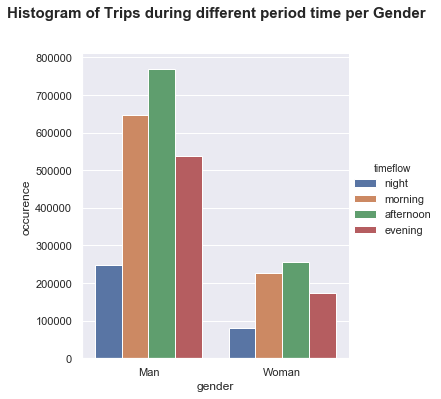

In [18]:
ax = sns.catplot(x='gender',hue='timeflow', y='occurence', kind="bar",data=df_gender)
ax.fig.suptitle('Histogram of Trips during different period time per Gender',fontweight="bold",y=1.1,fontsize=15)

In [19]:
df_week = df_flow.groupby(['dayofweek','timeflow']).agg({'bike':'count'})
df_week.columns = ['occurence']
df_week = df_week.reset_index()
df_week

,dayofweek,timeflow,occurence
0,weekday,night,293477
1,weekday,morning,729474
2,weekday,afternoon,824345
3,weekday,evening,577482
4,weekend,night,35536
5,weekend,morning,143874
6,weekend,afternoon,199980
7,weekend,evening,133967


Text(0.5, 1.1, 'Histogram of Trips Weekday and Weekend split by period')

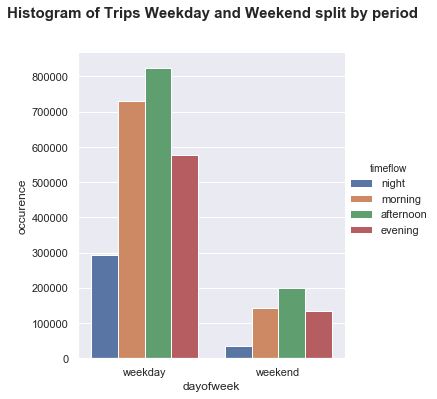

In [20]:
ax1 = sns.catplot(x='dayofweek',hue='timeflow', y='occurence', kind="bar",data=df_week)
ax1.fig.suptitle('Histogram of Trips Weekday and Weekend split by period',fontweight="bold",y=1.1,fontsize=15)

In [21]:
df_age = df_flow.groupby(['timeflow','age']).agg({'bike':'sum'})
df_age.columns = ['occurence']
df_age = df_age.reset_index()
df_age

,timeflow,age,occurence
0,night,14.0,30.0
1,night,15.0,290.0
2,night,16.0,473.0
3,night,17.0,1088.0
4,night,18.0,2095.0
...,...,...,...
299,evening,113.0,23.0
300,evening,114.0,21.0
301,evening,115.0,127.0
302,evening,116.0,1.0


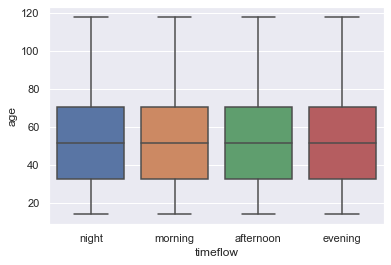

In [22]:
ax = sns.boxplot(x="timeflow", y="age",
                 data=df_age)

Text(0.5, 1.0, 'Age Distribution')

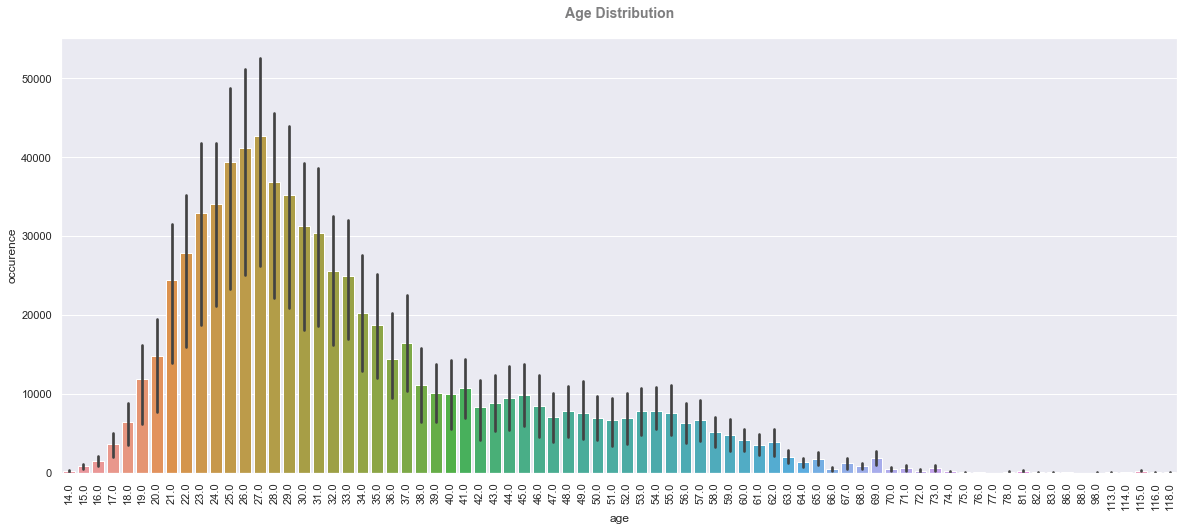

In [23]:
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(x = "age", y = "occurence", ax=ax, data=df_age)
# ax.fig.suptitle('Age Distribution',fontweight="bold",y=1.1,fontsize=15)
for label in ax.get_xticklabels() :
  label.set_rotation(90)
plt.title('Age Distribution',fontsize=14,pad=20,color='#7e7e7f',fontweight="bold")

In [24]:
df_station = df_flow.groupby(['start station id','timeflow']).agg({'bike':'count'})
df_station.columns = ['occurence']
df_station = df_station.reset_index()
df_station

,start station id,timeflow,occurence
0,1,night,0
1,1,morning,45
2,1,afternoon,134
3,1,evening,20
4,3,night,613
...,...,...,...
803,228,evening,247
804,232,night,1
805,232,morning,2
806,232,afternoon,0


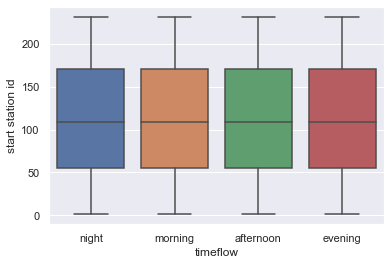

In [25]:
sns.boxplot(x="timeflow", y="start station id",
                 data=df_station)

In [26]:
def sex(x):
    if x==1:
        return "Man"
    else:
        return "Woman"
df_flow['gender'] = df_flow.gender.apply(sex)

In [27]:
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,gender,dayofweek,bike,timeflow,age
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,31.0
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,Man,weekday,1,night,30.0
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,Man,weekday,1,night,41.0
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,28.0
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,Woman,weekday,1,night,29.0


In [28]:
df_flow['pair'] = df_flow['start station id'].astype(str)+':'+df_flow['end station id'].astype(str)
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,gender,dayofweek,bike,timeflow,age,pair
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,31.0,115:96
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,Man,weekday,1,night,30.0,80:95
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,Man,weekday,1,night,41.0,91:68
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,28.0,115:96
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,Woman,weekday,1,night,29.0,105:88


In [29]:
df_odflow = df_flow[['tripduration','starttime','stoptime','timeflow','dayofweek','start station latitude','start station longitude',
                    'end station latitude','end station longitude','usertype','age']]

In [30]:
df_odflow.head()

,tripduration,starttime,stoptime,timeflow,dayofweek,start station latitude,start station longitude,end station latitude,end station longitude,usertype,age
0,542,0,0,night,weekday,42.387995,-71.119084,42.3734,-71.1111,Subscriber,31.0
1,438,0,0,night,weekday,42.361962,-71.092053,42.373,-71.0944,Subscriber,30.0
2,254,0,0,night,weekday,42.366277,-71.091690,42.3651,-71.1031,Subscriber,41.0
3,432,0,1,night,weekday,42.387995,-71.119084,42.3734,-71.1111,Subscriber,28.0
4,735,1,1,night,weekday,42.356954,-71.113687,42.374,-71.1014,Customer,29.0


In [31]:
df_odflow = df_odflow.drop(['tripduration'],axis=1)
df_odflow = df_odflow.drop(['timeflow'],axis=1)

### 3.4 Convert categorical data into numerical data 

In [32]:
df_odflow = df_flow.groupby(['start station id','end station id','start station latitude','start station longitude','end station latitude','end station longitude','starttime','stoptime','dayofweek']).agg({'bike':'count'})

In [33]:
df_odflow.columns = ['occurence']
df_odflow = df_odflow.reset_index()
df_odflow.head()

,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,starttime,stoptime,dayofweek,occurence
0,1,1,42.387151,-71.075978,42.3872,-71.076,9,9,weekday,2
1,1,1,42.387151,-71.075978,42.3872,-71.076,10,10,weekday,1
2,1,1,42.387151,-71.075978,42.3872,-71.076,10,11,weekday,1
3,1,1,42.387151,-71.075978,42.3872,-71.076,10,15,weekday,1
4,1,1,42.387151,-71.075978,42.3872,-71.076,11,11,weekday,3


#### Convert usertype into numerical data

In [34]:
def conv2num(day):
    if day == "weekday":
        return 1
    else:
        return 0
daylist = df_odflow.loc[:,'dayofweek'].apply(conv2num)
df_odflow.dayofweek = daylist
df_odflow.head()

,start station id,end station id,start station latitude,start station longitude,end station latitude,end station longitude,starttime,stoptime,dayofweek,occurence
0,1,1,42.387151,-71.075978,42.3872,-71.076,9,9,1,2
1,1,1,42.387151,-71.075978,42.3872,-71.076,10,10,1,1
2,1,1,42.387151,-71.075978,42.3872,-71.076,10,11,1,1
3,1,1,42.387151,-71.075978,42.3872,-71.076,10,15,1,1
4,1,1,42.387151,-71.075978,42.3872,-71.076,11,11,1,3


In [35]:
df_odflow = df_odflow.drop(['start station id','end station id'],axis=1) 

In [36]:
df_odflow.head()

,start station latitude,start station longitude,end station latitude,end station longitude,starttime,stoptime,dayofweek,occurence
0,42.387151,-71.075978,42.3872,-71.076,9,9,1,2
1,42.387151,-71.075978,42.3872,-71.076,10,10,1,1
2,42.387151,-71.075978,42.3872,-71.076,10,11,1,1
3,42.387151,-71.075978,42.3872,-71.076,10,15,1,1
4,42.387151,-71.075978,42.3872,-71.076,11,11,1,3


#### Now the O/D flow based hour and weekday and weekend, it's time to cluster

# 4. Cluster by weekend and weekday

In [37]:
train_data = df_odflow.drop(['dayofweek'],axis=1).to_numpy()
days = list(df_odflow['dayofweek'])

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_data)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
labels = list(kmeans.labels_)
len(labels)

656374

## To see whether we clustered correctly

In [40]:
weekday_count = days.count(1)
weekday_count

440332

In [41]:
weekday_labels = labels.count(1)
weekday_labels

652407

### Those results don't match each other. So we can't cluster the O/D flow into weekday and weekend

# 5. Cluster all the stations

## 5.1 Prepare the dataset for all station with similar patterns

In [42]:
df_flow.head()

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,gender,dayofweek,bike,timeflow,age,pair
0,542,0,0,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,31.0,115:96
1,438,0,0,80,42.361962,-71.092053,95,42.373,-71.0944,Subscriber,Man,weekday,1,night,30.0,80:95
2,254,0,0,91,42.366277,-71.091690,68,42.3651,-71.1031,Subscriber,Man,weekday,1,night,41.0,91:68
3,432,0,1,115,42.387995,-71.119084,96,42.3734,-71.1111,Subscriber,Man,weekday,1,night,28.0,115:96
4,735,1,1,105,42.356954,-71.113687,88,42.374,-71.1014,Customer,Woman,weekday,1,night,29.0,105:88


In [104]:
station_df = df_flow[['start station id','start station latitude','start station longitude','dayofweek','timeflow','gender','usertype','bike']]

In [105]:
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,timeflow,gender,usertype,bike
0,115,42.387995,-71.119084,weekday,night,Man,Subscriber,1
1,80,42.361962,-71.092053,weekday,night,Man,Subscriber,1
2,91,42.366277,-71.091690,weekday,night,Man,Subscriber,1
3,115,42.387995,-71.119084,weekday,night,Man,Subscriber,1
4,105,42.356954,-71.113687,weekday,night,Woman,Customer,1


#### Convert categorical data into numerical data

In [45]:
usertype = station_df[['usertype']]

from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
usertype_array = encoder.fit_transform(usertype)
usertype_array = usertype_array.toarray()


In [106]:
station_df = station_df.drop(['usertype'],axis=1)
station_df['usertype'] = list(usertype_array)
df_new = station_df.usertype.apply(pd.Series)
station_df = pd.concat([station_df,df_new],axis='columns')
station_df.columns = station_df.columns.astype(str)
station_df = station_df.rename(columns={"0": "Customer", "1": "Subscriber"})
station_df = station_df.drop(['usertype'],axis=1)
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,timeflow,gender,bike,Customer,Subscriber
0,115,42.387995,-71.119084,weekday,night,Man,1,0.0,1.0
1,80,42.361962,-71.092053,weekday,night,Man,1,0.0,1.0
2,91,42.366277,-71.091690,weekday,night,Man,1,0.0,1.0
3,115,42.387995,-71.119084,weekday,night,Man,1,0.0,1.0
4,105,42.356954,-71.113687,weekday,night,Woman,1,1.0,0.0


In [71]:
station_df.isna().sum()

start station id           0
start station latitude     0
start station longitude    0
dayofweek                  0
timeflow                   0
gender                     0
bike                       0
Customer                   0
Subscriber                 0
dtype: int64

In [107]:
gender_encoder = OneHotEncoder()
gendertype = station_df[['gender']]
gendertype_array = encoder.fit_transform(gendertype)
gendertype_array = gendertype_array.toarray()

In [108]:
station_df = station_df.drop(['gender'],axis=1)
station_df['gendertype_array'] = list(gendertype_array)
df_new = station_df.gendertype_array.apply(pd.Series)
station_df = pd.concat([station_df,df_new],axis='columns')

In [109]:
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,timeflow,bike,Customer,Subscriber,gendertype_array,0,1
0,115,42.387995,-71.119084,weekday,night,1,0.0,1.0,"[1.0, 0.0]",1.0,0.0
1,80,42.361962,-71.092053,weekday,night,1,0.0,1.0,"[1.0, 0.0]",1.0,0.0
2,91,42.366277,-71.091690,weekday,night,1,0.0,1.0,"[1.0, 0.0]",1.0,0.0
3,115,42.387995,-71.119084,weekday,night,1,0.0,1.0,"[1.0, 0.0]",1.0,0.0
4,105,42.356954,-71.113687,weekday,night,1,1.0,0.0,"[0.0, 1.0]",0.0,1.0


In [110]:
station_df = station_df.drop(['gendertype_array'],axis=1)
station_df.columns = station_df.columns.astype(str)
station_df = station_df.rename(columns={"0": "Man", "1": "Woman"})
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,timeflow,bike,Customer,Subscriber,Man,Woman
0,115,42.387995,-71.119084,weekday,night,1,0.0,1.0,1.0,0.0
1,80,42.361962,-71.092053,weekday,night,1,0.0,1.0,1.0,0.0
2,91,42.366277,-71.091690,weekday,night,1,0.0,1.0,1.0,0.0
3,115,42.387995,-71.119084,weekday,night,1,0.0,1.0,1.0,0.0
4,105,42.356954,-71.113687,weekday,night,1,1.0,0.0,0.0,1.0


In [111]:
daylist = station_df.loc[:,'dayofweek'].apply(conv2num)
station_df.dayofweek = daylist
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,timeflow,bike,Customer,Subscriber,Man,Woman
0,115,42.387995,-71.119084,1,night,1,0.0,1.0,1.0,0.0
1,80,42.361962,-71.092053,1,night,1,0.0,1.0,1.0,0.0
2,91,42.366277,-71.091690,1,night,1,0.0,1.0,1.0,0.0
3,115,42.387995,-71.119084,1,night,1,0.0,1.0,1.0,0.0
4,105,42.356954,-71.113687,1,night,1,1.0,0.0,0.0,1.0


In [112]:
station_temp = station_df

In [114]:
encoder = OneHotEncoder()
timeflow = station_df[['timeflow']]
timeflow_array = encoder.fit_transform(timeflow)
timeflow_array = timeflow_array.toarray()

In [115]:
station_df = station_df.drop(['timeflow'],axis=1)
station_df['timeflow'] = list(timeflow_array)
df_new = station_df.timeflow.apply(pd.Series)
station_df = pd.concat([station_df,df_new],axis='columns')
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,bike,Customer,Subscriber,Man,Woman,timeflow,0,1,2,3
0,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,"[0.0, 0.0, 0.0, 1.0]",0.0,0.0,0.0,1.0
1,80,42.361962,-71.092053,1,1,0.0,1.0,1.0,0.0,"[0.0, 0.0, 0.0, 1.0]",0.0,0.0,0.0,1.0
2,91,42.366277,-71.091690,1,1,0.0,1.0,1.0,0.0,"[0.0, 0.0, 0.0, 1.0]",0.0,0.0,0.0,1.0
3,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,"[0.0, 0.0, 0.0, 1.0]",0.0,0.0,0.0,1.0
4,105,42.356954,-71.113687,1,1,1.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 1.0]",0.0,0.0,0.0,1.0


In [116]:
station_df = station_df.drop(['timeflow'],axis=1)
station_df.columns = station_df.columns.astype(str)
station_df = station_df.rename(columns={"0": "night", "1": "morning","2":"afternoon","3":"evening"})
station_df.head()

,start station id,start station latitude,start station longitude,dayofweek,bike,Customer,Subscriber,Man,Woman,night,morning,afternoon,evening
0,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,80,42.361962,-71.092053,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,91,42.366277,-71.091690,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,105,42.356954,-71.113687,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [117]:
station_temp = station_df

#### Get the patterns and features of all stations.

In [119]:
station_usertype = station_df.groupby(['start station id','start station latitude','start station longitude']).agg({'Subscriber':'sum'})
station_usertype.columns = ['Subscriber']
station_usertype = station_usertype.reset_index()
station_all = station_usertype
station_all.head()

,start station id,start station latitude,start station longitude,Subscriber
0,1,42.387151,-71.075978,199.0
1,3,42.340021,-71.100812,6728.0
2,3,42.340115,-71.100619,3660.0
3,4,42.345392,-71.069616,16685.0
4,5,42.341814,-71.090179,15433.0


In [123]:
station_cus = station_df.groupby(['start station id','start station latitude','start station longitude']).agg({'Customer':'sum'})
station_cus.columns = ['Customer']
station_cus = station_cus.reset_index()
station_cus.head()
station_all['Customer'] = station_cus['Customer']
station_all.head()

,start station id,start station latitude,start station longitude,Subscriber,Customer
0,1,42.387151,-71.075978,199.0,0.0
1,3,42.340021,-71.100812,6728.0,972.0
2,3,42.340115,-71.100619,3660.0,0.0
3,4,42.345392,-71.069616,16685.0,5144.0
4,5,42.341814,-71.090179,15433.0,1629.0


In [124]:
num_man = station_df.groupby(['start station id','start station latitude','start station longitude']).agg({'Man':'sum'})
num_man.columns = ['man']
num_man = num_man.reset_index()
station_all['Man'] = num_man['man']
station_all.head()

,start station id,start station latitude,start station longitude,Subscriber,Customer,Man
0,1,42.387151,-71.075978,199.0,0.0,140.0
1,3,42.340021,-71.100812,6728.0,972.0,5089.0
2,3,42.340115,-71.100619,3660.0,0.0,2414.0
3,4,42.345392,-71.069616,16685.0,5144.0,16457.0
4,5,42.341814,-71.090179,15433.0,1629.0,12506.0


In [125]:
num_man = station_df.groupby(['start station id','start station latitude','start station longitude']).agg({'Woman':'sum'})
num_man.columns = ['woman']
num_man = num_man.reset_index()
station_all['Woman'] = num_man['woman']
station_all.head()

,start station id,start station latitude,start station longitude,Subscriber,Customer,Man,Woman
0,1,42.387151,-71.075978,199.0,0.0,140.0,59.0
1,3,42.340021,-71.100812,6728.0,972.0,5089.0,2611.0
2,3,42.340115,-71.100619,3660.0,0.0,2414.0,1246.0
3,4,42.345392,-71.069616,16685.0,5144.0,16457.0,5372.0
4,5,42.341814,-71.090179,15433.0,1629.0,12506.0,4556.0


In [127]:
station_all.isna().sum()
station_temp = station_all

In [128]:
timelist = ["night","morning","afternoon","evening"]
for time in timelist:
    station_df1 = station_df.groupby(['start station id','start station latitude','start station longitude']).agg({time:'sum'})
    station_df1.columns = [time]
    station_df1 = station_df1.reset_index()
    station_all[time] = station_df1[time]
# station_df = station_df.drop(['startid'],axis=1)
station_all.head()

,start station id,start station latitude,start station longitude,Subscriber,Customer,Man,Woman,night,morning,afternoon,evening
0,1,42.387151,-71.075978,199.0,0.0,140.0,59.0,134.0,20.0,45.0,0.0
1,3,42.340021,-71.100812,6728.0,972.0,5089.0,2611.0,3380.0,2061.0,1827.0,432.0
2,3,42.340115,-71.100619,3660.0,0.0,2414.0,1246.0,1683.0,1000.0,796.0,181.0
3,4,42.345392,-71.069616,16685.0,5144.0,16457.0,5372.0,5336.0,4349.0,7079.0,5065.0
4,5,42.341814,-71.090179,15433.0,1629.0,12506.0,4556.0,5255.0,5318.0,4810.0,1679.0


In [130]:
station_all.isna().sum()

start station id           0
start station latitude     0
start station longitude    0
Subscriber                 0
Customer                   0
Man                        0
Woman                      0
night                      0
morning                    0
afternoon                  0
evening                    0
dtype: int64

## 5.2 Cluster all stations

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
station_all[['start station latitude', 'start station longitude','Subscriber','Customer','Man','Woman','night','morning','afternoon','evening']] = scaler.fit_transform(station_all[['start station latitude','start station longitude','Subscriber','Customer','Man','Woman','night','morning','afternoon','evening']])
station_all.head()   

,start station id,start station latitude,start station longitude,Subscriber,Customer,Man,Woman,night,morning,afternoon,evening
0,1,0.999548,0.001272,0.002455,0.000000,0.002060,0.003374,0.003510,0.000838,0.002033,0.000000
1,3,0.998437,0.000923,0.083409,0.053480,0.075387,0.149328,0.088540,0.086307,0.082558,0.043170
2,3,0.998439,0.000926,0.045368,0.000000,0.035752,0.071261,0.044086,0.041876,0.035969,0.018087
3,4,0.998564,0.001361,0.206867,0.283026,0.243821,0.307235,0.139777,0.182119,0.319883,0.506146
4,5,0.998479,0.001072,0.191343,0.089629,0.185281,0.260566,0.137656,0.222697,0.217352,0.167783


In [176]:
train_data = station_all.drop(['start station id'],axis=1).to_numpy()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0,n_init=100).fit(train_data)
kmeans.inertia_

15.163891938755778

In [152]:
kmeans = KMeans(n_clusters=4, random_state=0,n_init=100).fit(train_data)
kmeans.inertia_

11.451730137400636

In [144]:
kmeans = KMeans(n_clusters=10, random_state=0,n_init=100).fit(train_data)
kmeans.inertia_

4.621810951411519

In [145]:
kmeans = KMeans(n_clusters=20, random_state=0,n_init=100).fit(train_data)
kmeans.inertia_

2.4198023966580187

In [146]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(train_data)
minibatch_kmeans.inertia_

10.19651419205616

## Finding the optimal number of cluster using silhouette score

In [164]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_data)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [165]:
for i in range(20):
    kmeans = KMeans(n_clusters=i+2, random_state=0,n_init=100).fit(train_data)
    score = silhouette_score(train_data,kmeans.labels_)
    sil_scores.append(score)
sil_scores

[0.6060891571032353,
 0.6118911205825848,
 0.5482981594734149,
 0.5562903030195463,
 0.4490603206339202,
 0.4669561178385906,
 0.46632929104584975,
 0.445441117832203,
 0.4471009946909407,
 0.4365597807166637,
 0.4118867437846354,
 0.4172197593614394,
 0.4161149031575168,
 0.3861992925433366,
 0.3886376729176289,
 0.42497986271916804,
 0.3868270798099194,
 0.3754812503971147,
 0.3982609058750912,
 0.39411709094653674]

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

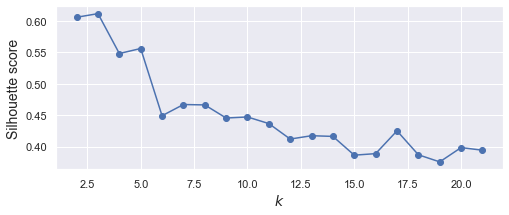

In [174]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 22), sil_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

#### As you can see the figure above, the best score is when k=3

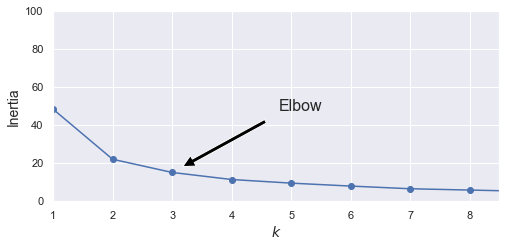

In [175]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 100])

plt.show()

### So the optimal k using silhouette score is 3

# 6. Cluster profiles of users

In [177]:
station_df.tail()

,start station id,start station latitude,start station longitude,dayofweek,bike,Customer,Subscriber,Man,Woman,night,morning,afternoon,evening
3627539,117,42.366095,-71.086388,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3627540,54,42.354979,-71.063348,1,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3627541,54,42.354979,-71.063348,0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3627542,54,42.354979,-71.063348,0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3627543,54,42.354979,-71.063348,0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [195]:
users_df = station_df
users_df[['end station id','end station latitude','end station longitude']] = df[['end station id','end station latitude','end station longitude']]
users_df['age'] = df_flow['age']

In [196]:
users_df.head()

,start station id,start station latitude,start station longitude,dayofweek,bike,Customer,Subscriber,Man,Woman,night,morning,afternoon,evening,end station id,end station latitude,end station longitude,age
0,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,96,42.3734,-71.1111,31.0
1,80,42.361962,-71.092053,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,95,42.373,-71.0944,30.0
2,91,42.366277,-71.091690,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,68,42.3651,-71.1031,41.0
3,115,42.387995,-71.119084,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,96,42.3734,-71.1111,28.0
4,105,42.356954,-71.113687,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,88,42.374,-71.1014,29.0


### We don't need column 'man,woman,customer,subscriber'

In [184]:
users_df = users_df.drop(['Customer','Subscriber','Man','Woman'],axis=1)
users_df.head()

,start station id,start station latitude,start station longitude,dayofweek,bike,night,morning,afternoon,evening,end station id,end station latitude,end station longitude,age
0,115,42.387995,-71.119084,1,1,0.0,0.0,0.0,1.0,96,42.3734,-71.1111,31.0
1,80,42.361962,-71.092053,1,1,0.0,0.0,0.0,1.0,95,42.373,-71.0944,30.0
2,91,42.366277,-71.091690,1,1,0.0,0.0,0.0,1.0,68,42.3651,-71.1031,41.0
3,115,42.387995,-71.119084,1,1,0.0,0.0,0.0,1.0,96,42.3734,-71.1111,28.0
4,105,42.356954,-71.113687,1,1,0.0,0.0,0.0,1.0,88,42.374,-71.1014,29.0


In [200]:
users_df = users_df.drop(['start station id','end station id'],axis=1)


In [208]:
users_df = users_df.dropna()

In [209]:
users_df.isna().sum()

start station latitude     0
start station longitude    0
dayofweek                  0
bike                       0
Customer                   0
Subscriber                 0
Man                        0
Woman                      0
night                      0
morning                    0
afternoon                  0
evening                    0
end station latitude       0
end station longitude      0
age                        0
dtype: int64

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
users_df[['start station latitude', 'start station longitude','end station longitude','end station latitude','night','morning','afternoon','evening','age']] = scaler.fit_transform(users_df[['start station latitude', 'start station longitude','end station latitude','end station longitude','night','morning','afternoon','evening','age']])
users_df.head()   

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alex\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,start station latitude,start station longitude,dayofweek,bike,Customer,Subscriber,Man,Woman,night,morning,afternoon,evening,end station latitude,end station longitude,age
0,0.999568,0.000666,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.999224,0.000779,0.163462
1,0.998954,0.001046,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.999214,0.001012,0.153846
2,0.999056,0.001051,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.999028,0.000891,0.259615
3,0.999568,0.000666,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.999224,0.000779,0.134615
4,0.998836,0.000742,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.999239,0.000914,0.144231


In [211]:
user_train = users_df.to_numpy()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0,n_init=10).fit(user_train)

In [212]:
kmeans.inertia_

1678979.6462283058

In [213]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_data)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [216]:
users_scores=[]
for i in range(20):
    kmeans = KMeans(n_clusters=i+2, random_state=0,n_init=100).fit(train_data)
    score = silhouette_score(train_data,kmeans.labels_)
    users_scores.append(score)
users_scores

[0.6060891571032353,
 0.6118911205825848,
 0.5482981594734149,
 0.5562903030195463,
 0.4490603206339202,
 0.4669561178385906,
 0.46632929104584975,
 0.445441117832203,
 0.4471009946909407,
 0.4365597807166637,
 0.4118867437846354,
 0.4172197593614394,
 0.4161149031575168,
 0.3861992925433366,
 0.3886376729176289,
 0.42497986271916804,
 0.3868270798099194,
 0.3754812503971147,
 0.3982609058750912,
 0.39411709094653674]

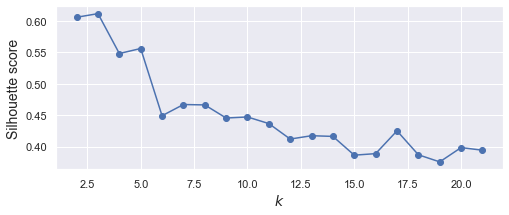

In [217]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 22), users_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### The user profile can be classified into 3 clusters.